# Solving a Regression Problem using the K-Nearest Neighbours Algorithm
Applying to a dataset (details below) to predict future 'HousePrice'

## Solving a regression problem
In order to solve a regression problem, the following steps need to be taken:
1. Find a suitable dataset
2. Define the input dataset
3. Explore the input dataset.
After exploration, it may be needed to pre-process the dataset in real-world classification problems,i.e., to clean and pre-process the input dataset to make it ready for model development. In this example, the dataset is clean so there is no need for pre-processing.
4. Form the training dataset and test dataset
6. Train the regressor using the chosen algorithm
7. Evaluate the regressor
8. Deploy the regressor to solve the target regression problem (not covered in this notebook)

### Applying the KNN Model on a Dataset

In order to solve the target regression problem, a HousePrice dataset was found from https://gist.github.com/grantbrown/5853625

Information about this dataset: This dataset contains 429 items, where each item refers to a house. It has three columns as listed below:

1. HouseAge in year
2. HouseSize in $m^2$
3. HousePrice in $

The input features are `HouseAge` and `HouseSize` and the attribute to be predicted or target attribute/variable is `HousePrice`.

## Initial Data Read and Test

In [159]:
# Import pandas package (library)
import pandas as pd

In [160]:
data = pd.read_csv('HousingData.csv') # call the Pandas method to read the data file: 'HousingData.csv'

In [161]:
# Take a look at the first few samples of data using the method head() of a pandas dataframe, by default, 5 samples
print(data.head())

     HouseAge  HouseSize   HousePrice
0  201.527404          2  71070.50796
1   94.202489          2  74816.49219
2  152.275420          3  82961.80115
3  147.102698          3  93921.31395
4   54.676407          3  92954.43001


## Section 2

### Form the training dataset, test dataset and futureSample set

#### Create the training and test datasets

In [162]:
# Import the train_test_split from sklearn.model.selection
from sklearn.model_selection import train_test_split

Define the input features X and the target attribute/variable using two ways

In [163]:
# Solution -- Way 1

# Define the input features X  directly
X = data[['HouseAge', 'HouseSize']]
y = data['HousePrice']

In [164]:
# Define the input features X as all columns except 'HousePrice' column and target variable y as the "HousePrice" column
X = data.drop('HousePrice', axis=1)
y = data['HousePrice']

In [165]:
# Using train_test_split function from sklearn to split the dataset into the training and test datasets, the percentage of samples in the test dataset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [166]:
# Set aside futureSample test datasets
# Take two samples from the testset as the future data samples, called futureSample_X, and futureSample_y,
# as the inputs from the real-world cases when the classifier is deployed.

# instantiated variables useful for predicting
# Get the last two samples from the test  to be the future data samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove the last two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

## Exploring the training and test datasets

In [167]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

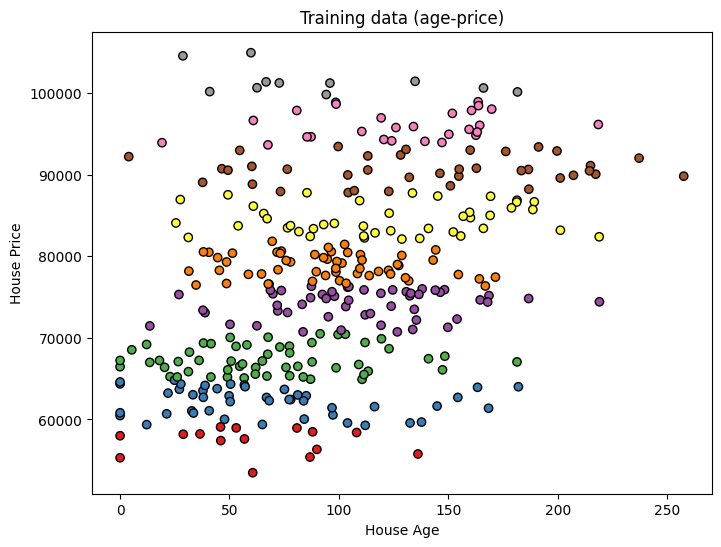

In [168]:
# Example

# Here, we visualise the distribution of the training data to understand the relationship betewen
# house age and house price.
plt.figure(1, figsize=(8, 6))
plt.scatter(X_train['HouseAge'], y_train, c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Age")
plt.ylabel("House Price")
plt.title("Training data (age-price)")
plt.show()

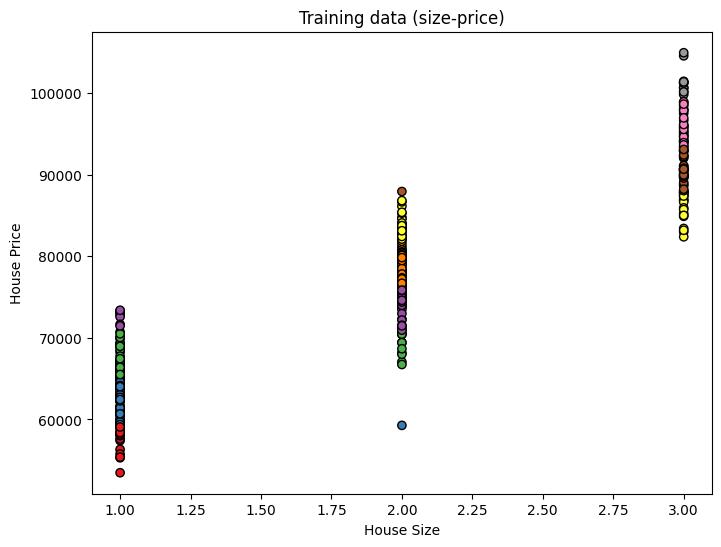

In [169]:
# Using the example of plotting the samples in the training dataset (age-price), plot the samples in the training dataset (size-price)
plt.figure(1, figsize=(8, 6))
plt.scatter(X_train['HouseSize'], y_train, c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Training data (size-price)")
plt.show()

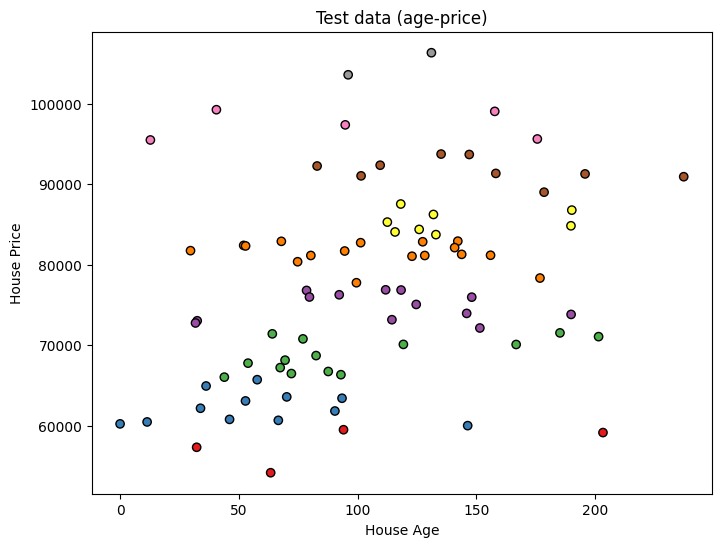

In [170]:
# Example

# plot the samples in the test dataset (age-price)
plt.figure(3, figsize=(8, 6))
plt.scatter(X_test['HouseAge'], y_test, c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Age")
plt.ylabel("House Price")
plt.title("Test data (age-price)")
plt.show()

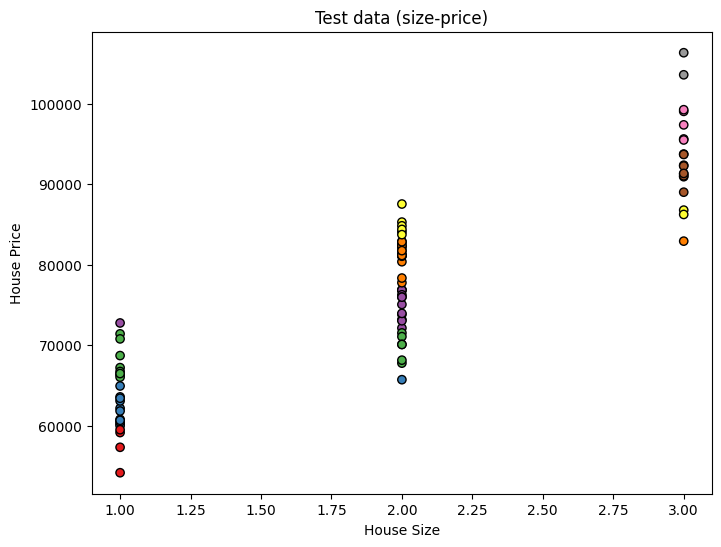

In [171]:
# Use the example of plotting the samples in the test dataset (age-price), plot the samples in the test dataset (size-price)
plt.figure(4, figsize=(8, 6))
plt.scatter(X_test['HouseSize'], y_test, c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Test data (size-price)")
plt.show()

## Training the KNN Model using SKlearn 

#### In this Python Notebook, we focus on using the K-Nearest-Neighbour Algorithm to solve our Regression Problem: predicting 'HousePrice'

### Train a regressor by using a chosen learning algorithm with the trainig dataset.

***First***, take an integer in the range of 1-5 from the user and save it to `model_option` to represent a model.

`model_option`:
* 1- Support vector regression,
* 2- linear regression,
* 3- K nearest neighbours and
* 4- decision tree
* 5- Random forest

If a user enters a number  >5, print out a message "invalid option number. Try again".

***Second***, train the model using the train dataset

***Third***, evaluate the model using the test dataset

***Lastly***, consume the model using the futureSample test dataset

In [172]:
# creates a model (classifier learner model) selection prompt for user
# NOTE: IN THIS PYTHON NOTEBOOKK, I DETAIL OPTION 3: K-NEAREST NEIGHBOURS
model_option = int(input("Choose one model from the following: 1-Support vector regression, 2- linear regression, 3- K nearest neighbours, 4-decision tree and 5-Random Forest \n your choice: "))
if (model_option == 1):
    # Import SVR from sklearn.svm.
    from sklearn.svm import SVR
    """
    Call the constructor SVR() to create a SVR object, name it as 'model', by passing the following key parameters:

    (i)  'kernel': Specifies the kernel type to be used in the algorithm. possible values are ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and ‘precomputed’.
         Default is ’rbf’.
    (ii) 'degree': Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels. Default=3
    (iii) 'gamma': Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
          Possible values are ‘scale’ (1 / (n_features * X.var())) and ‘auto’ (1 / n_features).
          Default is ’scale’.
    (iv)  'C': Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
        Default=1.0
    (v) 'epsilon': Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
        Must be non-negative. Default=0.1
    (vi) 'max_iter': Hard limit on iterations within solver, or -1 for no limit. Default is -1.
    """

    model = SVR(gamma='auto')
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
    
elif (model_option == 2):
    #  Import LinearRegression from sklearn.linear_model.
    from sklearn.linear_model import LinearRegression
    """
    Call the constructor LinearRegression() to create a linear regression object, name it as 'model', by passing the following parameters:
    (i) 'fit_intercep': Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered). Default=True
    (ii) 'copy_X': If True, X will be copied; else, it may be overwritten. Default=True
    """
    model = LinearRegression()
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 3):
    # Import KNeighborsRegressor from sklearn.neighbors.
    from sklearn.neighbors import KNeighborsRegressor
    
    # Here we are creating a KNN regressor object named 'model' using the KNieghboursRegressor class
    # The key parameters passed to the constructor are:
    # -n_neighbours=3: This specifies that the algorithm will consider 3 nearest neighbours
    # when predicitng 
    # In other words, our "k" value for 'K-nearest-neighbours' is 3 -> this value is used for 
    # the prediction value of neighbouring nodes (data points)

    """
    Call the constructor KNeighborsRegressor() to create a KNN regressor, name it as 'model', by passing the following parameters:
    (i) 'n_neighbors': Number of neighbors to use by default for kneighbors queries. Default is 5.
    (ii) 'weights': Weight function used in prediction. Possible values are ‘uniform’ (uniform weights),
         ‘distance’ (weight points by the inverse of their distance) and
         [callable] (a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights). Default = 'uniform'
    (iii) 'algorithm': Algorithm used to compute the nearest neighbors. Possible values are ‘auto’ (attempt to decide the most appropriate algorithm based on the values passed to fit method),
          ‘ball_tree’ (use BallTree), ‘kd_tree’ (use KDTree), and ‘brute’ (use a brute-force search). Default is ’auto’.
    (iv) 'metric': Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.
    """
    model = KNeighborsRegressor(n_neighbors=3)
    # Train this model using the training dataset (X_train, y_train).
    # This line fits (trains) the KNN model on the features 'X_train' and the target y_train
    # During this process, the model stores the training samples to use later for prediction
    model.fit(X_train, y_train)

    # print statement indicating the KNN model is ready
    print("KNN model is trained")
    
elif (model_option == 4):
    #  Import DecisionTreeRegressor from sklearn.tree.
    from sklearn.tree import DecisionTreeRegressor
    """
    Call the constructor DecisionTreeRegressor () to create a decision tree regressor, name it as 'model', by passing the following key parameters:
    (i) "criterion": The function to measure the quality of a split.
         Possible options are “squared_error” (the mean squared error), “friedman_mse” ( mean squared error with Friedman’s improvement score),
         “absolute_error” (the mean absolute error, which minimizes the L1 loss using the median of each terminal node), “poisson” (uses reduction in Poisson deviance to find splits).
         Default=”squared_error”
    (ii) "splitter": The strategy used to choose the split at each node.
          Supported strategies are “best” to choose the best split and “random” to choose the best random split. Default is ”best”.
    (iii) "max_depth": Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or contains fewer than `min_samples_split` samples
    (iv) "min_samples_split": Minimum number of samples required to split an internal node, default is 2
    (v) "min_samples_leaf" Minimum number of samples required to be at a leaf node. default is 1.
    (vi) "max_features": number of features to consider when looking for the best split, default is None (max_features=n_features).
        Other values are 'sqrt' (max_features=sqrt(n_features)) and "log2” (max_features=log2(n_features))
    (vii) "random_state": Controls the randomness of the estimator. default is None.
          To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer, say random_state = 42.
    (viii) 'min_impurity_decrease': A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default=0.0.
    """
    model = DecisionTreeRegressor()
    # Train this DT regressor using the training data set (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 5):
    # Import Random forest regreesor from sklearn.ensemble.
    from sklearn.ensemble import RandomForestRegressor
    """
    Call the constructor RandomForestRegressor () to create a random forest regreesor, name it as 'model', by passing the following key parameters:
    (i) 'n_estimator': Number of trees in the forest, default is 100
    (ii) "criterion": The function to measure the quality of a split.
         Possible options are “squared_error” (the mean squared error), “friedman_mse” ( mean squared error with Friedman’s improvement score),
         “absolute_error” (the mean absolute error, which minimizes the L1 loss using the median of each terminal node), “poisson” (uses reduction in Poisson deviance to find splits).
         Default=”squared_error”
    (iii) "max_depth": Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or contains fewer than `min_samples_split` samples
    (iv) "min_samples_split": Minimum number of samples required to split an internal node, default is 2
    (v) "min_samples_leaf" Minimum number of samples required to be at a leaf node. default is 1.
    (vi) "max_features": number of features to consider when looking for the best split, default is None (max_features=n_features).
        Other values are 'sqrt' (max_features=sqrt(n_features)) and "log2” (max_features=log2(n_features)).
    (vii) 'min_impurity_decrease': A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default=0.0.
    (viii)'bootstrap': Whether to use bootstrap samples when building trees, default is 'True'.
          If 'False', the entire dataset is used to build each tree, which may lead to overfitting.
    (ix)   'oob_score': Whether to use out-of-bag samples to estimate the generalisation accuracy.
          default value is 'False'. If 'True', an unbiased estimate of the model performance is provided.
    (x) 'max_samples': If bootstrap is True, the number of samples to draw from X to train each base estimator. If None (default), then draw X.shape[0] samples. Default=None
    (xi) "random_state": Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and
         the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
         Default is None.
    """
    model = RandomForestRegressor(n_estimators=3, max_depth=3, max_features=2, max_samples=100, random_state=12)
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
else: print("invalid option number. Try again")


KNN model is trained


## Section 5

### Evaluate a regression model

In [173]:
# Import required package for evaluating a regression model
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Test the regression model's performance using the method `predict()` to calculate the predicted values of test data and store the values in a variable, `solution_test`, and use a number of measures to evaluate the performance of this model.

In [174]:
# Predicting the house prices for the test dataset (X_test)
# The 'predict' method is used to make the predictions using the recently trained KNN model
# It takes the features from X_test -> e.g., 'HouseAge' and 'HouseSize' and predicts the 
# corresponding house prices ('HousePrice' -> y vlaue)

y_pred = model.predict(X_test)

In [175]:
# We now evaluate the model's performance, such that:
# 1. We first calculate the R-squared score, which measure show well the predicted values match the
# actual values
# The higher the R-squared score (the closer it is to 1), the better the model's performance
r2_test = metrics.r2_score(y_test, y_pred)
print(r2_test)

0.2763498748965243


In [176]:
# 2. We calculate the Mean Absolute Error (MAE), which measures the average magnitude of the errors
# between the predicted and actual values
# It's essentially a measure of how much the predictions DEVIATE from the actual values (on average),
# allowing us to observe the overall accuracy of the KNN model's prediction (output value/data)
mean_absolute_error_test = metrics.mean_absolute_error(y_test, y_pred) 
print(mean_absolute_error_test)

7856.608580595237


In [177]:
# We calculate the Mean Absolute Percentage Error (MAPE) -> this measures the prediction accuracy of 
# the KNN model, expressing such an accuracy as a percentage. A MAPE of 0% of indicates no error whereby
# the model has a clear interpretation of the input/data value, and else otherwise.

import numpy as np

# Define a function MAPE() which takes y as the true value and y_predict as the predicted value and returns the Mean Absolute Percentage Error over the test dateset. One sample's Absolute Percentage Error is calculated as: abs((y-y')*100/y)
# Use the methods mean() and abs() in numpy
def MAPE(y, y_predict):
    return np.mean(np.abs((y - y_predict) / y)) * 100

# Calculate the MAPE using the function MAPE() and y=y_test and y_predict = y_pred
mape_test = MAPE(y_test, y_pred)
print(mape_test)

10.39554499182811


In [178]:
# The RMSE (Root Mean Squared Error) is used to measure the differences between the values predicted
# by the KNN model and the values actually observed. Similar to MAPE, we use the RMSE formula to 
# understand the accuracy of the model's prediction: lower values of RMSE indicate a 'better fit'

# Calculate RMSE using the method sqrt() in numpy and mean_squared_error() in metrics
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse_test)

10097.279389290046


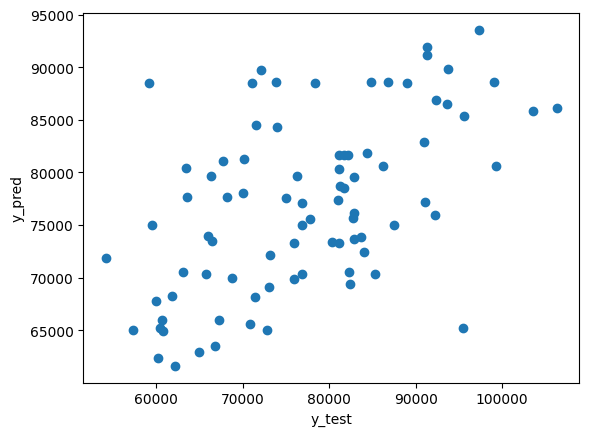

In [179]:
# We finally plot the relationship between the acutal house prices (y_test) and the predicted house 
# prices (y_pred)
# The scatter plot is used to visually illustrate the differences in comparison to the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('y_test') # label for ACTUAL house prices
plt.ylabel('y_pred') # label for the PREDICTED house prices
plt.show() # use the .show() method to visually display the scatter plot 

## Section 6

### Predict the values for the data samples in the future sample set
Use the futureSample_X to simulate the new data items in a real-world application scenario. Use the method `predict()` to calculate the predicted values of futureSample data and store the values in a variable, `solution_validate`.

In [180]:
'''Essentially -> 'Generate the predicitions for future/test data we want to extrapolate' '''

# Here, we essentially train the KNN model to make predictions on the futureSample_X, which 
# is the x_values of the dataset: namely, 'HouseAge' and 'HouseSize'
# The .predict() method is called on the model, passing futureSample_X as the argument
# Predicted values of samples in the futureSample dataset
solution_validate = model.predict(futureSample_X)

In [181]:
# Convert the DataFrame to a list
futureSample_X = futureSample_X.values.tolist() # necessary to ensure we iterate over the individual input features in a more simple, list-based format for the comparison later on
futureSample_y = futureSample_y.tolist()
# ^ this instantiated variable now contains the actual target values corresponding to each row in futureSample_X

In [182]:
'''Solution print the model's predictions and compare the predicted and actual values side by side,
providing insight into how well the (KNN) model generalises the (unseen) data
'''
# Display the comparison of the predicted and actual values of samples in the futureSample dataset
for i in range (2): # loop runs twice to compare the first two input data rows and their corresponding predictions
    
    print("For the {} future data, {}, the predicted value is {} and the actual value is {}".format(i, futureSample_X[i], solution_validate[i], futureSample_y[i]))

For the 0 future data, [12.6248723, 2.0], the predicted value is 65182.53054666667 and the actual value is 76092.39261
For the 1 future data, [131.5013312, 1.0], the predicted value is 70733.35764666666 and the actual value is 65299.52186


In [183]:
'''To create our own future/test data values, and utilise the KNN model to predict the y_value, HousePrice
to extrapolate a corresponding prediction result'''

house_age = float(input("Enter house age: "))
house_size = float(input("Enter house size: "))

x_values = [[house_age, house_size]]  # our custom datast of inputtted x_values -> HouseAge and HouseSize

predicted_house_price = model.predict(x_values)

print(f"The preedicted house price for a house with age {house_age} and size {house_size} is: {predicted_house_price}.")

The preedicted house price for a house with age 201.0 and size 2.0 is: [88543.527].


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
